<a href="https://colab.research.google.com/github/Kaiaysez/Estimating-potting-probability-in-billiards/blob/main/Pool_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os # Iterate through directories and join paths
import cv2 # For doing image operations
import tensorflow as tf
from tensorflow import keras
import pickle
import random


"""Specifying data directory, formating images and visualizing images."""

DATADIR =  "/content/drive/MyDrive"
CATEGORIES = ["Missed","Potted"]

IMG_SIZE = 150 # Constant for resizing image

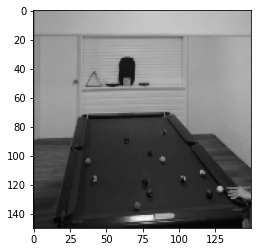

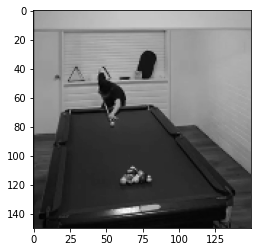

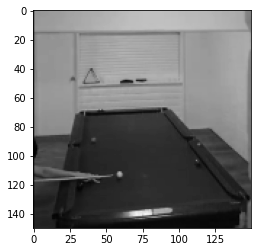

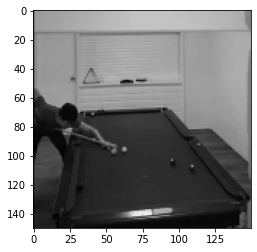

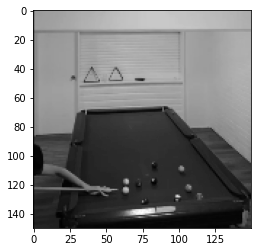

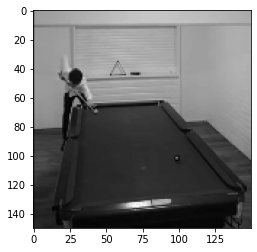

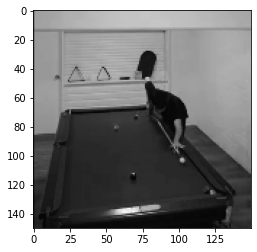

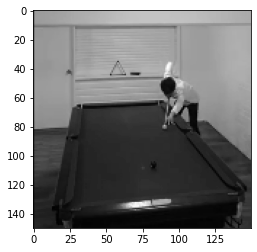

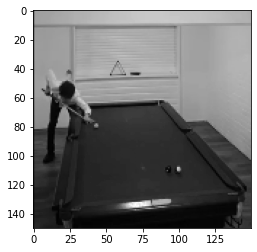

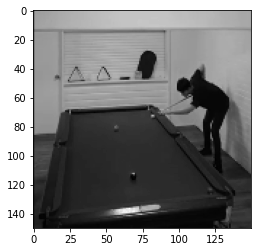

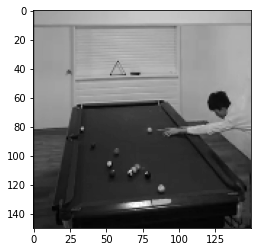

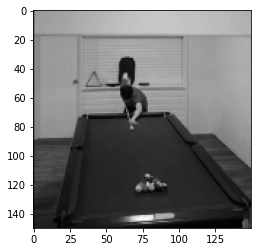

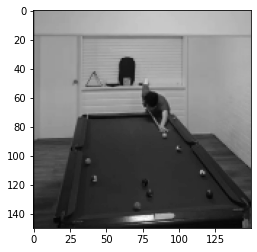

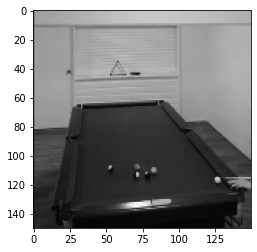

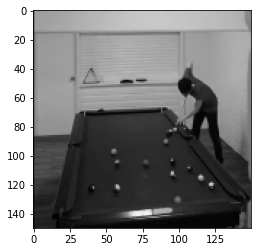

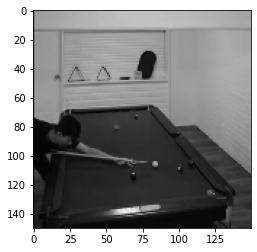

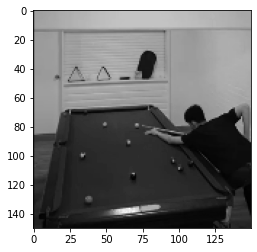

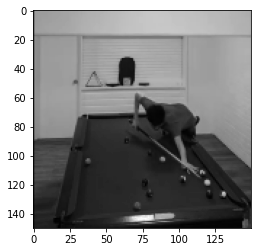

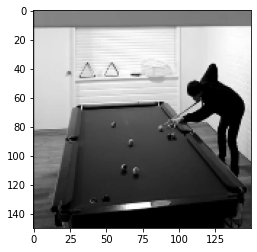

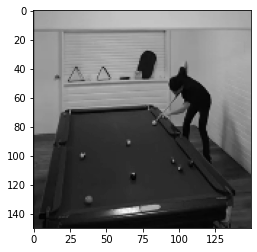

In [2]:
count = 20 # Number of pictures to display for exploratory visualization purposes
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
    for img in os.listdir(path): # For each image in the Miss/Success folder
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
        img_array = img_array[415:784,370:762] # Cropping the image
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                # the images will be extremely blurry. I am guessing 
        plt.imshow(img_array, cmap = "gray") # Show the image represented by img_array
        plt.show()
        count = count - 1
        if count == 0:
            break
    break

In [3]:
training_data = [] # List containing [image,class] lists where image is a matrix, and class is 0 or 1

"""Appends properly formatted training data into training_data"""
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
        class_no = CATEGORIES.index(category) # The index of category in the list CATEGORIES
        for img in os.listdir(path): # For each image in the Miss/Success folder
            #img_array = cv2.imread(os.path.join(path,img))
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
            img_array = img_array[415:784,370:762] # Cropping the image
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                    # the images will be extremely blurry. I am guessing 
                                                                    # that the resizing is done via some sort of filter.
            training_data.append([new_array, class_no]) # Append training_data with a list containing the image, and the
                                                        # class it belongs to
            
create_training_data()
    

random.shuffle(training_data)

X = [] # features (every pixel is a feature, so we have 150x150 = 22500 features)
y = [] # labels
for images,labels in training_data:
    X.append(images)
    y.append(labels)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X = X/255
y = np.array(y)
# y = tf.one_hot(y, depth=2)

In [43]:
y.shape
#X.shape

(481,)

In [4]:

"""
model = keras.Sequential([
   keras.layers.AveragePooling2D(pool_size=6, strides=3, input_shape=(IMG_SIZE,IMG_SIZE,1)),
   keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
   keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2, strides=2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(units=128, activation='relu'),
   keras.layers.Dense(units=2, activation='softmax')
])
"""

"""
model = keras.Sequential([
   keras.layers.Conv2D(20, 3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),   
   #keras.layers.BatchNormaliza0tion(),
   keras.layers.MaxPool2D(3,3), # (Size,Stride)
   keras.layers.Dropout(0.3),

   keras.layers.Conv2D(40, 3, activation='relu'), # (No. of filters, kernel size)
   #keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(3,3),
   keras.layers.Dropout(0.3),

   keras.layers.Conv2D(80, 7, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(3,2),   
   keras.layers.Dropout(0.3),

   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(2, activation='softmax')
])
"""


# VGG PERFORMS TERRIBLY
model = keras.Sequential([
   keras.layers.Conv2D(filters=50, kernel_size=3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'), 
   keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=3), 

   keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu'), 
   keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=3), 
   keras.layers.BatchNormalization(),

   keras.layers.Conv2D(filters=150, kernel_size=3, activation='relu'), 
   keras.layers.Conv2D(filters=150, kernel_size=3, activation='relu'),
   keras.layers.MaxPool2D(pool_size=2,strides=2), 
 
   
   
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(64, activation='relu'), 
   keras.layers.Dropout(0.2),  
   keras.layers.Dense(2, activation='softmax')
])


"""
# Alexnet is so-so, haven't tried tweaking it much
model = keras.Sequential([
   keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, input_shape=(IMG_SIZE,IMG_SIZE,3), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=3,strides=2),

   keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=3,strides=2),

   keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=3,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])
"""

"""
Trying to start off with a huuuggee kernel
model = keras.Sequential([
   #keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=3,strides=2,input_shape=(IMG_SIZE,IMG_SIZE,1)),

   keras.layers.Conv2D(filters=80, kernel_size=19, strides=4, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=1),

   keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])
"""

"""
model = keras.Sequential([
   keras.layers.Conv2D(filters=30, kernel_size=7, strides=1, padding='same', input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'),    
   keras.layers.MaxPool2D(pool_size=2,strides=2,input_shape=(IMG_SIZE,IMG_SIZE,1)),

   keras.layers.Conv2D(filters=60, kernel_size=5, strides=1, padding='same', activation='relu'), 
   keras.layers.Conv2D(filters=60, kernel_size=5, strides=1, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=2),

   keras.layers.Conv2D(filters=100, kernel_size=3, padding='same', activation='relu'),
   keras.layers.Conv2D(filters=100, kernel_size=3, padding='same', activation='relu'), 
   keras.layers.MaxPool2D(pool_size=2,strides=2), 

   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   #keras.layers.Dropout(0.3),
   #keras.layers.Dense(512, activation='relu'),  
   keras.layers.Dense(2, activation='softmax')
])
"""



model.compile(optimizer = "adam",
              #loss = keras.losses.BinaryCrossentropy(),  
              loss = keras.losses.SparseCategoricalCrossentropy(),           
              metrics = ["accuracy"],
              )

model.fit(X,y, epochs = 2000, batch_size = 180, class_weight = {0:600.,1:200.})



Epoch 1/2000
3/3 [==============================] - 14s 2s/step - loss: 302.3190 - accuracy: 0.4491
Epoch 2/2000
3/3 [==============================] - 1s 294ms/step - loss: 244.3274 - accuracy: 0.4345
Epoch 3/2000
3/3 [==============================] - 1s 289ms/step - loss: 232.4625 - accuracy: 0.4200
Epoch 4/2000
3/3 [==============================] - 1s 295ms/step - loss: 233.4957 - accuracy: 0.4200
Epoch 5/2000
3/3 [==============================] - 1s 291ms/step - loss: 232.6229 - accuracy: 0.4200
Epoch 6/2000
3/3 [==============================] - 1s 290ms/step - loss: 230.1058 - accuracy: 0.4200
Epoch 7/2000
3/3 [==============================] - 1s 290ms/step - loss: 230.9904 - accuracy: 0.4220
Epoch 8/2000
3/3 [==============================] - 1s 292ms/step - loss: 226.1973 - accuracy: 0.4200
Epoch 9/2000
3/3 [==============================] - 1s 292ms/step - loss: 232.0941 - accuracy: 0.4200
Epoch 10/2000
3/3 [==============================] - 1s 292ms/step - loss: 225.6895 

KeyboardInterrupt: ignored

In [81]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 148, 148, 50)      500       
                                                                 
 conv2d_61 (Conv2D)          (None, 146, 146, 50)      22550     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 49, 49, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 47, 47, 100)       45100     
                                                                 
 conv2d_63 (Conv2D)          (None, 45, 45, 100)       90100     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 15, 15, 100)      0         
 g2D)                                                

In [ ]:
filt, bias = model.layers[0].get_weights()
for i in range(30):
    plt.imshow((filt[:,:,:,i]+bias[i]).reshape(7,7), cmap = "gray")
    plt.show()


In [ ]:
first_layer = keras.Model(inputs=model.inputs , outputs=model.layers[1].output)
image = load_img(" ", target_size=(150,150))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

In [ ]:
def predict_training(img_array,label = 2):
    plt.imshow(img_array.reshape(IMG_SIZE,IMG_SIZE), cmap = "gray")
    # Note that model.predict() takes in the img_array as input, then returns a list in a list 
    # containing predictions in order of the classes, eg [[0.3,0.7]].
    if img_array.shape[2] == 1: # Grayscale
        plt.annotate("Probability of potting a ball: "  +
                      str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,1))[0][1]*100,3)) +
                      "%", (5,8))
    elif img_array.shape[2] == 3: # Color
        plt.annotate("Probability of potting a ball: "  +
                      str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,3))[0][1]*100,3)) +
                      "%", (5,8))
    if label == 0:
        plt.annotate("Made the pot: No", (5,15))
    if label == 1:
        plt.annotate("Made the pot: Yes", (5,15))
    plt.show()
  

for i in range(len(X)):
    predict_training(X[i],y[i])

In [5]:
print(np.round(model.predict(X),3))

[[0.467 0.533]
 [0.159 0.841]
 [0.629 0.371]
 [0.165 0.835]
 [0.479 0.521]
 [0.793 0.207]
 [0.262 0.738]
 [0.563 0.437]
 [0.42  0.58 ]
 [0.291 0.709]
 [0.109 0.891]
 [0.612 0.388]
 [0.361 0.639]
 [0.809 0.191]
 [0.579 0.421]
 [0.285 0.715]
 [0.261 0.739]
 [0.614 0.386]
 [0.363 0.637]
 [0.626 0.374]
 [0.397 0.603]
 [0.323 0.677]
 [0.278 0.722]
 [0.346 0.654]
 [0.215 0.785]
 [0.354 0.646]
 [0.134 0.866]
 [0.824 0.176]
 [0.391 0.609]
 [0.262 0.738]
 [0.647 0.353]
 [0.216 0.784]
 [0.227 0.773]
 [0.325 0.675]
 [0.196 0.804]
 [0.377 0.623]
 [0.146 0.854]
 [0.34  0.66 ]
 [0.286 0.714]
 [0.234 0.766]
 [0.758 0.242]
 [0.212 0.788]
 [0.619 0.381]
 [0.588 0.412]
 [0.411 0.589]
 [0.179 0.821]
 [0.282 0.718]
 [0.152 0.848]
 [0.577 0.423]
 [0.241 0.759]
 [0.516 0.484]
 [0.459 0.541]
 [0.58  0.42 ]
 [0.256 0.744]
 [0.316 0.684]
 [0.489 0.511]
 [0.238 0.762]
 [0.349 0.651]
 [0.195 0.805]
 [0.541 0.459]
 [0.459 0.541]
 [0.703 0.297]
 [0.349 0.651]
 [0.54  0.46 ]
 [0.301 0.699]
 [0.711 0.289]
 [0.115 0.

In [7]:
def predict_test(img_array_view, img_array, label = 2):
    plt.imshow(np.flip(img_array_view, axis=-1) )
    # Note that model.predict() takes in the img_array as input, then returns a list in a list 
    # containing predictions in order of the classes, eg [[0.3,0.7]]. 
    plt.annotate("Probability of potting a ball: " +
                  str(np.round(model.predict(img_array.reshape(1,IMG_SIZE,IMG_SIZE,1))[0][1]*100,3)) +
                  "%", (5,18))
    if label == 0:
        plt.annotate("Made the pot: No", (5,55))
    if label == 1:
        plt.annotate("Made the pot: Yes", (5,55))
    plt.show()    

In [8]:
def format_images(image_path,color):
    formatted_images = []
    if color == True:
        for img in os.listdir(image_path):            
            img_array = cv2.imread(os.path.join(image_path,img)) # Read with color
            img_array = img_array[415:795,370:762] # Cropping the image
            img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizing the image
            img_array = img_array/255 # Divide all pixel values by 255
            formatted_images.append(img_array)
        return formatted_images
    elif color == False:
        for img in os.listdir(image_path):            
            img_array = cv2.imread(os.path.join(image_path,img), cv2.IMREAD_GRAYSCALE) 
            img_array = img_array[415:795,370:762] # Cropping the image
            img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizing the image
            img_array = img_array/255 # Divide all pixel values by 255
            formatted_images.append(img_array)
        return formatted_images


In [9]:
def format_images_view(image_path):
    formatted_images = []    
    for img in os.listdir(image_path):            
        img_array = cv2.imread(os.path.join(image_path,img)) # Read with color
        img_array = img_array[415:795,370:762] # Cropping the image
        formatted_images.append(img_array)
    return formatted_images

In [10]:
view_test_images_f = format_images_view("/content/drive/MyDrive/f.files")
test_images_f = format_images("/content/drive/MyDrive/f.files",False)

    
view_test_images_s = format_images_view("/content/drive/MyDrive/s.files")
test_images_s = format_images("/content/drive/MyDrive/s.files",False)


  

In [ ]:
print(len(view_test_images_f))
for i in range(len(view_test_images_f)):   
    predict_test(view_test_images_f[i],test_images_f[i])
    
print(len(view_test_images_s))
for i in range(len(view_test_images_s)):   
    predict_test(view_test_images_s[i], test_images_s[i])  

In [11]:
print("For unsuccessful shots:")
val_accuracy_f = model.evaluate(np.array(test_images_f), np.zeros(len(test_images_f)))

print("For successful shots:")
val_accuracy_s = model.evaluate(np.array(test_images_s), np.ones(len(test_images_s)))

For unsuccessful shots:
2/2 [==============================] - 1s 396ms/step - loss: 0.9592 - accuracy: 0.3500
For successful shots:
3/3 [==============================] - 0s 134ms/step - loss: 0.4742 - accuracy: 0.8116
